## Gestalt Principles: Similarity, Proximity, Connection, Closure




### Import required packages

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the parquet data file and explore

In [2]:
df_students=pd.read_parquet('students.parquet', engine='pyarrow', dtype_backend='pyarrow')
df_students.rename(columns={'race/ethnicity':'race'},inplace=True)
df_students
### Explore the different columns of this dataframe
df_students.race.value_counts()

df_students['parental level of education'].value_counts()

df_students['lunch'].value_counts()
df_students['lunch']=df_students['lunch'].replace('free/reduced', 'free')
df_students['test preparation course'].value_counts()

df_students['total']=df_students['math score']+df_students['writing score']+df_students['reading score']



### Principle 1 : Similarity 

Bad example : The below plot shows Maths vs Reading marks of the 1000 students from above dataframe

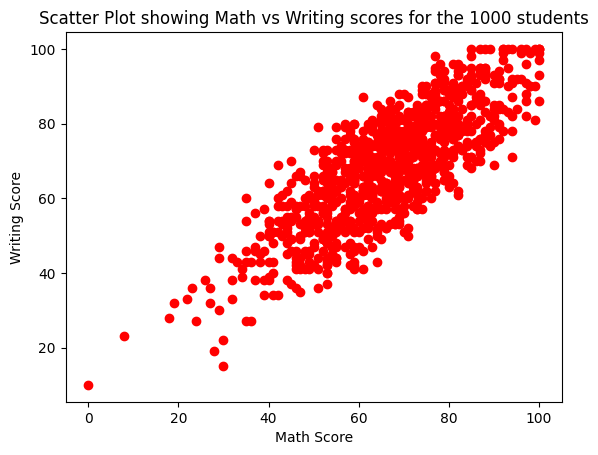

In [3]:
plt.scatter(df_students['math score'], df_students['writing score'],color='red')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for the 1000 students')
plt.savefig('Similarity_bad_example')


Good Example (Using colour) : The same plot showing similarity between Gender : Meaning all Males are in black color and all feamles are in red color.
Here Colour was used. Other alternative is to use shape.
The law of similarity in gestalt theory states that elements that look similar to each other are grouped together in the mind.
As we can in the graph below, females performed well than males in terms of scores.

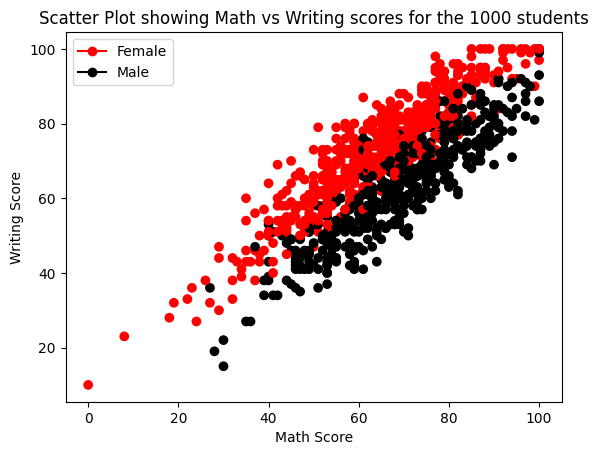

In [4]:

from matplotlib.lines import Line2D 
plt.scatter(df_students['math score'], df_students['writing score'], c=df_students['gender'].map({'male':'black','female':'red'}))

legend_elements = [Line2D([0], [0], marker='o',color='red', label='Female'),
                   Line2D([0], [0], marker='o', color='black', label='Male')]
plt.legend(handles=legend_elements)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for the 1000 students')
plt.savefig('Similarity_good_example_1')


Good Example (Using colour and shape) : The same plot showing similarity between Gender : Meaning all Males are in black color and all feamles are in red color.
Here Colour and Shape are used to differentiate between Gender.
The law of similarity in gestalt theory states that elements that look similar to each other are grouped together in the mind.
As we can in the graph below, females performed well than males in terms of scores.

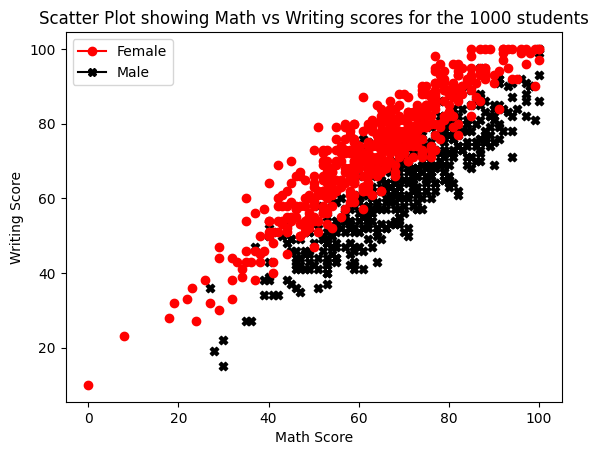

In [5]:

df_students_male=df_students[df_students['gender']=='male']
df_students_female=df_students[df_students['gender']=='female']

plt.scatter(df_students_male['math score'], df_students_male['writing score'],c='black',marker='X')
plt.scatter(df_students_female['math score'], df_students_female['writing score'], c='red')

legend_elements = [Line2D([0], [0], marker='o',color='red', label='Female'),
                   Line2D([0], [0], marker='X', color='black', label='Male')]
plt.legend(handles=legend_elements)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for the 1000 students')
plt.savefig('Similarity_good_example_2')


### Principle 2 : Proximity

Bad example : The below plot shows Maths vs Reading marks of the 1000 students from above dataframe. To compare the students in terms of students with good scores vs average scores vs poor scores, this plot just shows all data points, but doesn't differentiate graphically between student score buckets (like top 100 students)

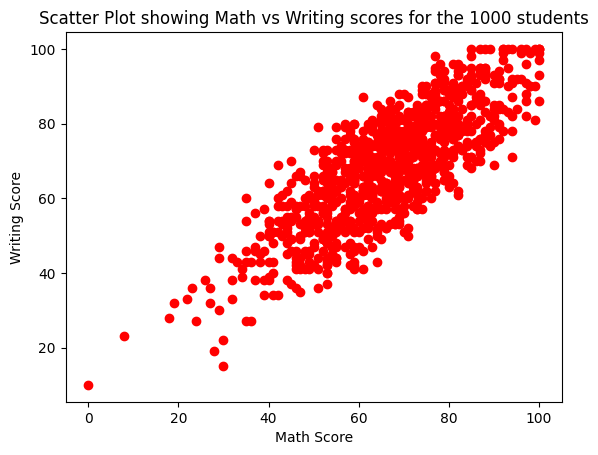

In [6]:
plt.scatter(df_students['math score'], df_students['writing score'], c='r')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for the 1000 students')
plt.savefig('Proximity_bad_example')


Good example : The below graph shows gap between top 100 and bottom 100 students. Proximity meaning a cluster of data points being close to each other versus far away from each other. The example below shows how the top 100 students (based on their scores) and bottom 100 students are far away from each other on the graph.

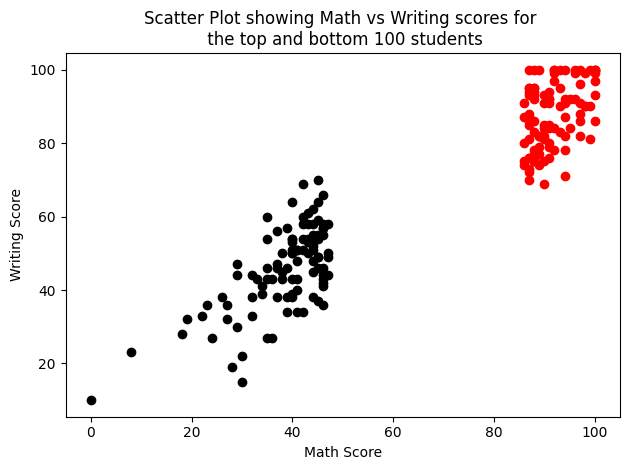

In [7]:
df_students=df_students.sort_values(by=['math score'])
df_students_bottom_20=df_students[:100]
df_students_bottom_20_40=df_students[100:200]
plt.scatter(df_students_bottom_20['math score'], df_students_bottom_20['writing score'], c='black')
df_students_top_20=df_students.tail(100)
plt.scatter(df_students_top_20['math score'], df_students_top_20['writing score'], c='red')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for \n the top and bottom 100 students', loc='center')
plt.tight_layout()

plt.savefig('Proximity_good_example_1')


Good example : The below graph shows gap between bottom 100 students and next set of 100 students. Proximity meaning a cluster of data points being close to each other versus far away from each other. The example below shows how the bottom 100 students (based on their scores) and next set of bottom 100 students are near from each other on the graph.

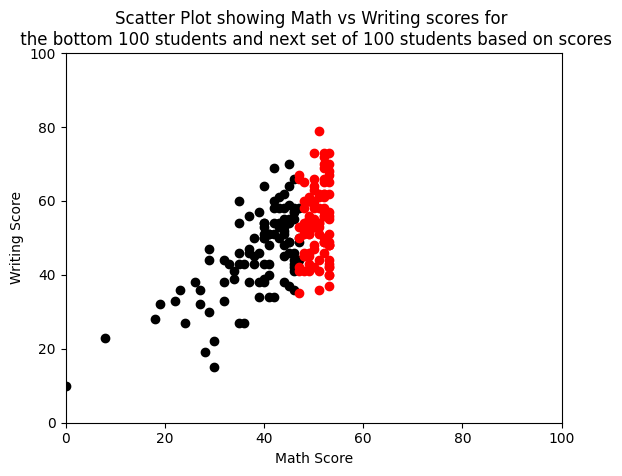

In [8]:
plt.scatter(df_students_bottom_20['math score'], df_students_bottom_20['writing score'], c='black')
plt.scatter(df_students_bottom_20_40['math score'], df_students_bottom_20_40['writing score'], c='red')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot showing Math vs Writing scores for \n the bottom 100 students and next set of 100 students based on scores', loc='center')
plt.savefig('Proximity_good_example_2')


### Principle 3 : Connection

In [9]:
#### Get student marks statistics like mean, median and then plot them
df_student_stats=pd.DataFrame(df_students.describe())
df_student_stats=df_student_stats.loc[['std','mean','50%','75%']][['math score','reading score','writing score']]
df_student_stats

,math score,reading score,writing score
std,15.16308,14.600192,15.195657
mean,66.089,69.169,68.054
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0


#### Bad example : Just plot the statistics of marks for Maths, Reading and Writing

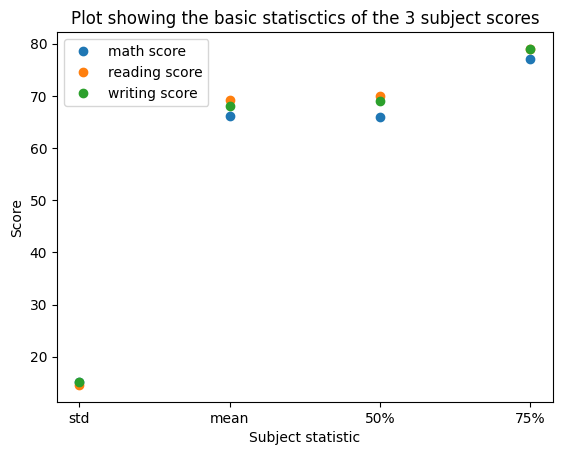

In [10]:
plt.plot(df_student_stats, linestyle='',marker='o')
plt.legend(df_student_stats.columns)
plt.title('Plot showing the basic statisctics of the 3 subject scores')
plt.xlabel('Subject statistic')
plt.ylabel('Score')
plt.savefig('Connection_bad_example')

Good Example : Plot the values with a connecting line so that interpretation is easy to see the change is the values, understanding the upward/downward trend.

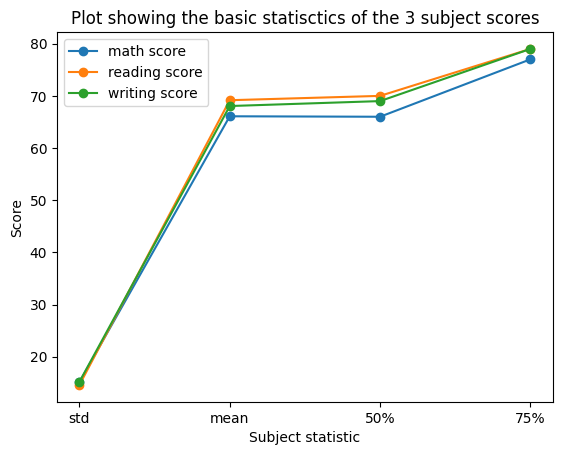

In [11]:
plt.plot(df_student_stats,  marker="o")
plt.legend(df_student_stats.columns)
plt.title('Plot showing the basic statisctics of the 3 subject scores')
plt.xlabel('Subject statistic')
plt.ylabel('Score')
plt.savefig('Connection_good_example')


### Principle 4 : Closure

#### Bad example : The table belpw showing lunch and gender column in a cross tab and a bar chart. 


In [12]:
crosstable=pd.crosstab(df_students['gender'],df_students['lunch'])
crosstable

lunch,free,standard
gender,,
female,189,329
male,166,316


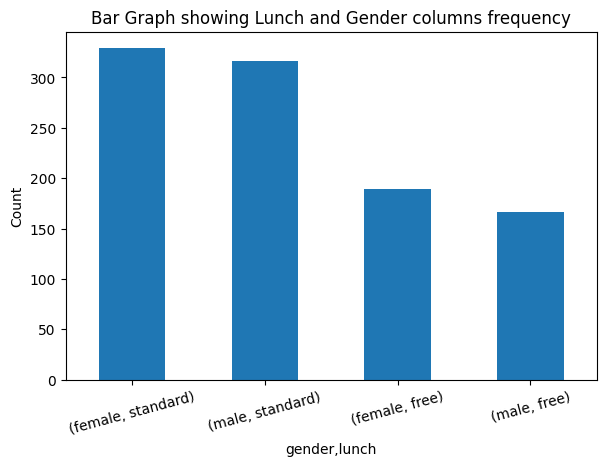

In [13]:
df_students[['gender','lunch']].value_counts().plot(kind='bar', ylabel='Count')
plt.xticks(rotation=15)
plt.subplots_adjust(top=0.925, 
                    bottom=0.20, 
                    left=0.07, 
                    right=0.90, 
                    hspace=0.01, 
                    wspace=0.01)
plt.title('Bar Graph showing Lunch and Gender columns frequency')
plt.savefig('Closure_bad_example')


Good example : The plot below has a closed box for each category - for example : female with reduced lunch is a section in the space plot.


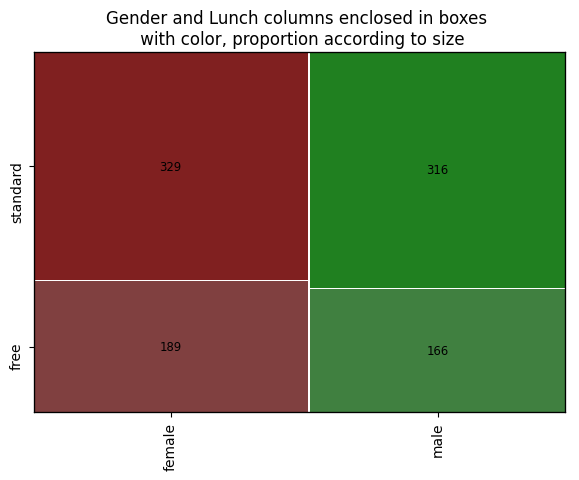

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
labelizer=lambda k:{('male','standard'):316,('female','standard'):329,('male','free'):166,('female','free'):189}[k]
mosaic(df_students,['gender','lunch'],labelizer=labelizer, label_rotation=90)
plt.title('Gender and Lunch columns enclosed in boxes \n with color, proportion according to size')
plt.subplots_adjust(top=0.900, 
                    bottom=0.15, 
                    left=0.07, 
                    right=0.90, 
                    hspace=0.01, 
                    wspace=0.01)
plt.savefig('Closure_good_example')
